## Imports

In [88]:
import torch
import torchvision

from torch.utils.data import DataLoader, Dataset

import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os



In [53]:
## Setting torch seed

random_seed = 1
torch.manual_seed(random_seed)

## Data Loaders and MINST DataSet

In [55]:
#Loaders Parameters
batch_size_train = 64
batch_size_test = 1000

path = "/home/franio/Desktop/handwritten-digits-recognizer/"


train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(path, train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST(path, train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)


### Examples

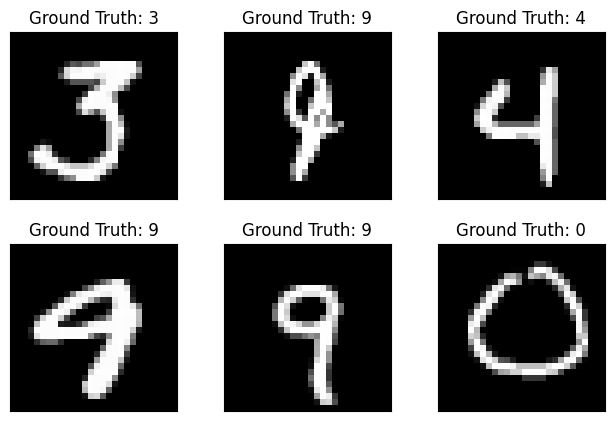

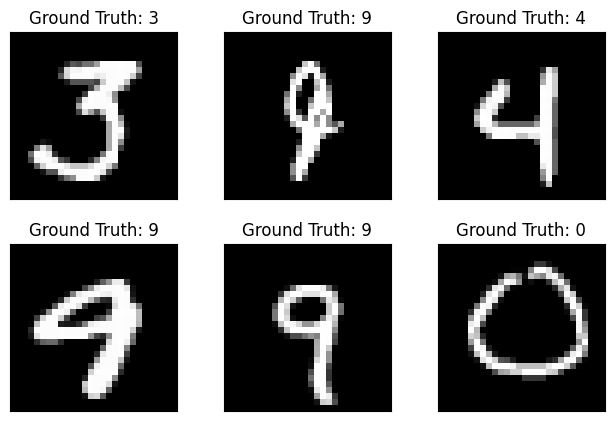

In [56]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

## Model Architecture

In [57]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

## Training the model

=========== Epoch 0 ===========


/tmp/ipykernel_8287/4236297093.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


=========== Epoch 1 ===========
=========== Epoch 2 ===========


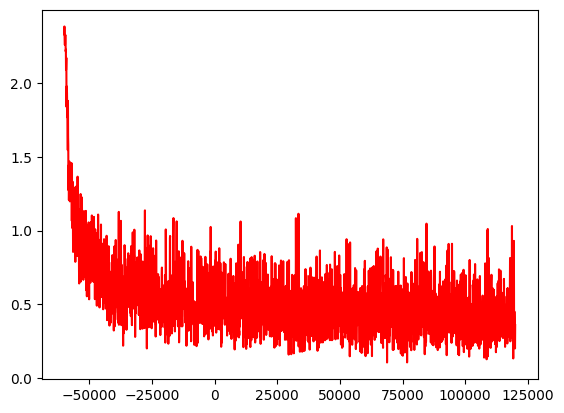

In [64]:



#Hyperparameters
n_epochs = 3
learning_rate = 0.01

model = MyModel()

optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()


train_losses = []
train_counter = []

for epoch in range(n_epochs):
    model.train()
    print(f"=========== Epoch {epoch + 1} ===========")
    
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        
        loss = criterion(output, target)
        train_losses.append(loss.item())
        train_counter.append((batch_idx*64) + ((epoch)*len(train_loader.dataset)))

        loss.backward()
        optimizer.step()


plt.plot(train_counter, train_losses, color='red')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()

## Saving a model


In [67]:
torch.save(model.state_dict(), "model.pth")

## Testing a model


In [90]:
test_losses = []

test_loss = 0
correct = 0

model.eval()
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        
        test_loss += criterion(output, target).item()
        pred = output.data.max(1, keepdim=True)[1]
        
        correct += pred.eq(target.data.view_as(pred)).sum()
        
        test_losses.append(criterion(output, target).item())
        
    test_loss /= len(test_loader.dataset)
    
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


counter = np.arange(len(test_losses))
plt.plot(counter, test_losses)

/tmp/ipykernel_8287/4236297093.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 0.0001, Accuracy: 9657/10000 (97%)



AttributeError: module 'matplotlib.pyplot' has no attribute 'plor'